# BÀI TẬP PHÂN TÍCH EDA CƠ BẢN

## Đề Bài

Phân tích EDA cho dữ liệu product trong 'order_products__prior.csv'.
1. Tìm tên 10 sản phẩm bán được nhiều nhất và vẽ biểu đồ.
2. Tìm tên 10 sản phẩm được re-ordered nhiều nhất và vẽ biểu đồ.
3. Thống kê số lượng sản phẩm bán được của các department và vẽ biểu đồ:
    - Biểu đồ cột.
    - Biểu đồ tree-map.

## Script

### Using

In [1]:
import squarify
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Contract Fields

In [2]:
CN_ORD_ID = 'order_id'
CN_PROD_ID = 'product_id'
CN_RE_ORDED = 'reordered'

In [3]:
CN_PROD_NAME = 'product_name'
CN_DEPT_ID = 'department_id'

In [4]:
CN_DEPT = 'department'

### Processing

In [5]:
ord_prods_pri_df = pd.read_csv('order_products__prior.csv')
prods_df = pd.read_csv('products.csv')
depts_df = pd.read_csv('departments.csv')

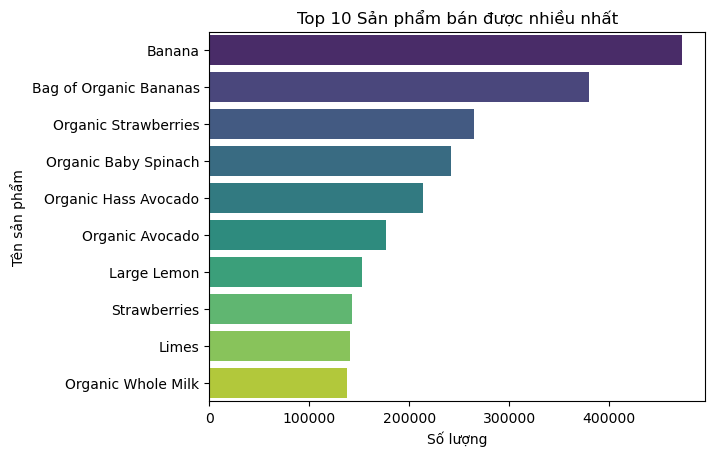

In [6]:
# Request 1
top_selling_prods_df = ord_prods_pri_df[CN_PROD_ID].value_counts().head(10).to_frame().reset_index()
top_selling_prods_df.columns = [CN_PROD_ID, 'count']
top_selling_prods_df = pd.merge(top_selling_prods_df, prods_df[[CN_PROD_ID, CN_PROD_NAME]], on=CN_PROD_ID, how='left')
sns.barplot(x='count', y=CN_PROD_NAME, data=top_selling_prods_df, palette='viridis')
plt.title('Top 10 Sản phẩm bán được nhiều nhất')
plt.xlabel('Số lượng')
plt.ylabel('Tên sản phẩm')
plt.show()

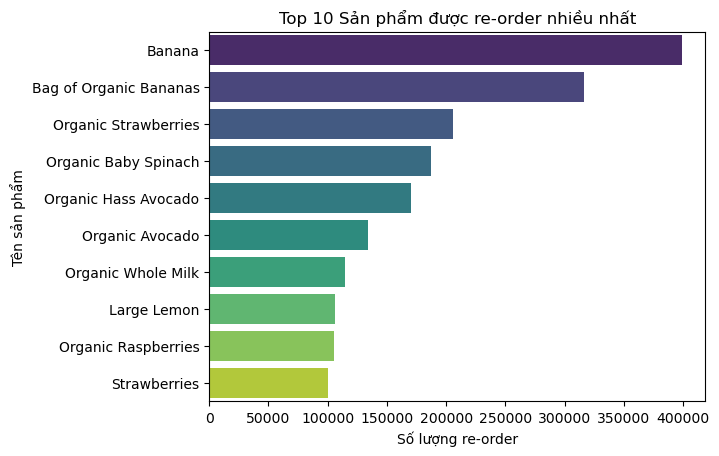

In [7]:
# Request 2
top_re_orded_prods_df = ord_prods_pri_df.groupby(CN_PROD_ID)[CN_RE_ORDED].sum().nlargest(10).to_frame().reset_index()
top_re_orded_prods_df.columns = [CN_PROD_ID, 'reordered_count']
top_re_orded_prods_df = pd.merge(top_re_orded_prods_df, prods_df[[CN_PROD_ID, CN_PROD_NAME]], on=CN_PROD_ID, how='left')
sns.barplot(x='reordered_count', y=CN_PROD_NAME, data=top_re_orded_prods_df, palette='viridis')
plt.title('Top 10 Sản phẩm được re-order nhiều nhất')
plt.xlabel('Số lượng re-order')
plt.ylabel('Tên sản phẩm')
plt.show()

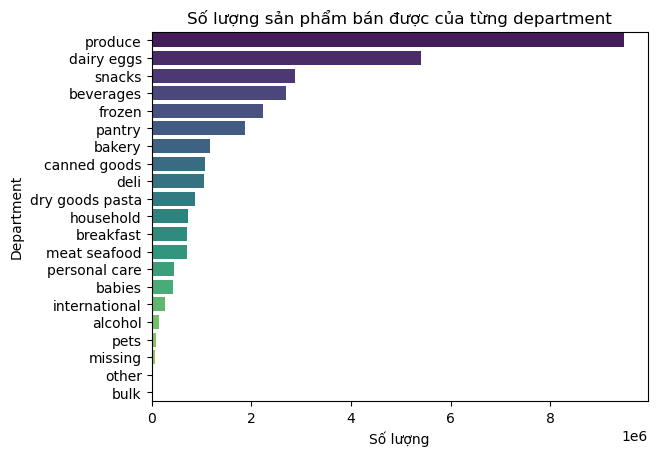

In [8]:
# Request 3.1
prod_by_dept_df1 = pd.merge(ord_prods_pri_df, prods_df[[CN_PROD_ID, CN_DEPT_ID]], on=CN_PROD_ID, how='left').groupby(CN_DEPT_ID)[CN_PROD_ID].count().sort_values(ascending=False).to_frame().reset_index()
prod_by_dept_df1.columns = [CN_DEPT_ID, 'count']
prod_by_dept_df1 = pd.merge(prod_by_dept_df1, depts_df, on=CN_DEPT_ID, how='left')
sns.barplot(x='count', y=CN_DEPT, data=prod_by_dept_df1, palette='viridis')
plt.title('Số lượng sản phẩm bán được của từng department')
plt.xlabel('Số lượng')
plt.ylabel('Department')
plt.show()

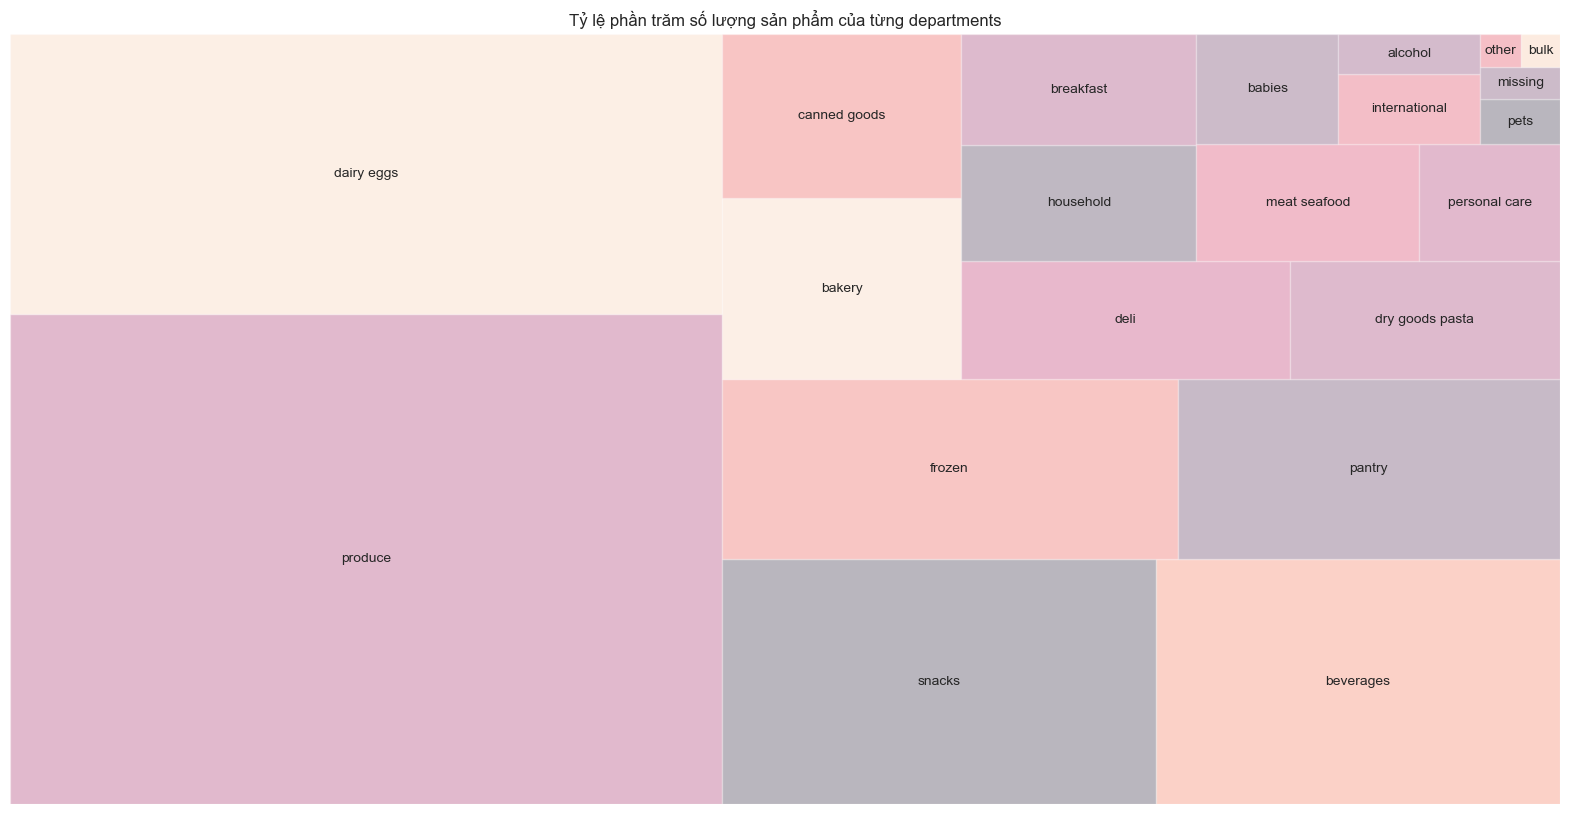

In [9]:
# Request 3.2
prod_by_dept_df2 = pd.merge(ord_prods_pri_df, prods_df[[CN_PROD_ID, CN_DEPT_ID]], on=CN_PROD_ID, how='left')
prod_by_dept_df2 = (prod_by_dept_df2.groupby(CN_DEPT_ID)[CN_PROD_ID].count().sort_values(ascending=False) / len(prod_by_dept_df2) * 100).to_frame().reset_index()
prod_by_dept_df2.columns = [CN_DEPT_ID, 'percentage']
prod_by_dept_df2 = pd.merge(prod_by_dept_df2, depts_df, on=CN_DEPT_ID, how='left')
plt.figure(figsize=(20, 10))
sns.set_style('whitegrid')
sns.color_palette('husl')
sns.set_palette('husl')
sns.despine()
squarify.plot(sizes=prod_by_dept_df2['percentage'], label=prod_by_dept_df2[CN_DEPT], alpha=.3)
plt.title('Tỷ lệ phần trăm số lượng sản phẩm của từng departments')
plt.axis('off')
plt.show()